In [219]:
import pandas as pd
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)
# Load the Stata file into a DataFrame


# Display the first few rows of the DataFrame
column_names = df.columns.tolist()

# Print the column names



In [352]:
# Assuming df is your DataFrame
# Filter the DataFrame for post_policy == 1 and the specified states
df_filtered = df.query("post_policy == 1 & (state == 'California' | state == 'New Jersey')")

# Define the variables
birth_vars = [f'C(_IBirth_{i})' for i in range(2, 52)]  # Categorical variable for _IBirth_2 to _IBirth_51
post_policy_var = ['C(_Ipost_poli_1)']  # Categorical variable for post policy
birxpos_vars = [f'_IBirXpos_{i}_1' for i in range(2, 11)]  # Numeric variables for _IBirXpos_2_1 to _IBirXpos_10_1
llbirth_vars = [f'C(_LlBirth_{i})' for i in range(8, 51)]  # Categorical variable for _LlBirth_8 to _LlBirth_50
llbipos_vars = [f'_LlBiXpos_{i}_1' for i in range(8, 51)]  # Numeric variables for _LlBiXpos_8_1 to _LlBiXpos_50_1

# Combine all variables into one list
all_vars = birth_vars + post_policy_var + llbipos_vars 
# Create the regression formula
formula = 'rm_lfp ~ ' + ' + '.join(all_vars)
model1 = smf.ols(formula, data=df_filtered).fit(cov_type='cluster', cov_kwds={'groups': X1['sippid']})
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.522
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.91e-07
Time:                        17:33:00   Log-Likelihood:                -10966.
No. Observations:               16427   AIC:                         2.203e+04
Df Residuals:                   16376   BIC:                         2.243e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7554      0

/Users/rebeccluo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 93, but rank is 50
  warnings.warn('covariance of constraints does not have full '


In [ ]:

# Create the formula
X1 = df.query("post_policy == 1 & (state == 'California' | state == 'New Jersey')")
formula1 = 'rm_lfp ~ ' + ' + '.join(C(all_vars)) + ' + C(state) + C(rhcalyr) + C(sippid)'
model1 = smf.ols(formula1, data=X1).fit(cov_type='cluster', cov_kwds={'groups': X1['sippid']})

latex_output = model1.summary().as_latex()
print(latex_output)

In [221]:

# Check the extracted columns

df = df[all_vars+ ['rm_lfp', 'end_weight']]


In [137]:


if df.shape[0] == 0:

   raise ValueError("No data left after dropping rows with missing values.")


In [24]:
from ISLP.models import ModelSpec as MS
from statsmodels.api import OLS
from statsmodels.api import Logit


X = df[all_vars]

y = df['rm_lfp']

 

# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Ridge regression regularization values
lambdas = 10**np.linspace(8, -2, 100) / y.std()


In [25]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    soln_array = skl.ElasticNet.path(X_scaled, y, l1_ratio=0., alphas=lambdas)[1]
    print(soln_array.shape)
    



(50, 100)


In [244]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# Compute the ridge path
coefs = []
for alpha in lambdas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

# Verify the shape of coefficients
print(coefs.shape)  # Should match (100, number of features)

# Ensure that the number of columns matches
assert coefs.shape[1] == len(df[all_vars].columns), "Mismatch between coefficients and feature columns"


(100, 50)


In [245]:
print(soln_array.shape) 
print(len(df[all_vars].columns)) 

(50, 100)
50


In [246]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=df[all_vars].columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,_IBirth_2,_IBirth_3,_IBirth_4,_IBirth_5,_IBirth_6,_IBirth_7,_IBirth_8,_IBirth_9,_IBirth_10,_IBirth_11,...,_IBirth_42,_IBirth_43,_IBirth_44,_IBirth_45,_IBirth_46,_IBirth_47,_IBirth_48,_IBirth_49,_IBirth_50,_IBirth_51
negative log(lambda),,,,,,,,,,,,,,,,,,,,,
-19.152013,5.085411e-11,5.402057e-11,5.840406e-11,5.799593e-11,6.271415e-11,5.829049e-11,5.276686e-11,5.871167e-11,6.122663e-11,6.642933e-11,...,-3.630169e-11,-3.816733e-11,-3.403734e-11,-2.651740e-11,-2.523195e-11,-2.486805e-11,-2.174316e-11,-2.522083e-11,1.759334e-10,-3.093772e-11
-18.919429,6.417060e-11,6.816623e-11,7.369756e-11,7.318256e-11,7.913628e-11,7.355425e-11,6.658422e-11,7.408572e-11,7.725924e-11,8.382431e-11,...,-4.580754e-11,-4.816171e-11,-4.295026e-11,-3.346117e-11,-3.183912e-11,-3.137992e-11,-2.743676e-11,-3.182508e-11,2.220028e-10,-3.903897e-11
-18.686845,8.097412e-11,8.601603e-11,9.299577e-11,9.234592e-11,9.985866e-11,9.281494e-11,8.401976e-11,9.348557e-11,9.749010e-11,1.057743e-10,...,-5.780256e-11,-6.077318e-11,-5.419708e-11,-4.222321e-11,-4.017641e-11,-3.959697e-11,-3.462126e-11,-4.015870e-11,2.801357e-10,-4.926160e-11
-18.454260,1.021777e-10,1.085399e-10,1.173474e-10,1.165273e-10,1.260073e-10,1.171192e-10,1.060209e-10,1.179654e-10,1.230186e-10,1.334720e-10,...,-7.293856e-11,-7.668706e-11,-6.838895e-11,-5.327964e-11,-5.069688e-11,-4.996570e-11,-4.368708e-11,-5.067453e-11,3.534912e-10,-6.216109e-11
-18.221676,1.289337e-10,1.369618e-10,1.480756e-10,1.470408e-10,1.590032e-10,1.477876e-10,1.337832e-10,1.488555e-10,1.552318e-10,1.684226e-10,...,-9.203802e-11,-9.676809e-11,-8.629707e-11,-6.723128e-11,-6.397220e-11,-6.304957e-11,-5.512684e-11,-6.394400e-11,4.460553e-10,-7.843840e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.943500,8.673860e-03,9.243561e-03,1.006207e-02,9.915679e-03,1.077487e-02,9.847887e-03,8.734520e-03,9.846934e-03,1.029379e-02,1.124867e-02,...,-8.908987e-03,-9.242559e-03,-8.410684e-03,-6.908774e-03,-6.632405e-03,-6.531520e-03,-5.893691e-03,-6.524954e-03,2.913288e-02,-1.019616e-02
3.176085,8.473283e-03,9.038655e-03,9.857692e-03,9.696555e-03,1.055215e-02,9.603318e-03,8.471606e-03,9.586079e-03,1.002905e-02,1.098241e-02,...,-9.417298e-03,-9.746883e-03,-8.899344e-03,-7.372663e-03,-7.087148e-03,-6.977980e-03,-6.326724e-03,-6.953172e-03,2.861417e-02,-1.135789e-02
3.408669,8.198519e-03,8.756438e-03,9.572815e-03,9.394681e-03,1.024255e-02,9.271372e-03,8.122237e-03,9.234720e-03,9.671283e-03,1.061900e-02,...,-9.989029e-03,-1.031250e-02,-9.449563e-03,-7.899293e-03,-7.603950e-03,-7.485281e-03,-6.820534e-03,-7.438676e-03,2.788314e-02,-1.270720e-02


In [247]:
soln_path.columns = soln_path.columns.str.lstrip('_')



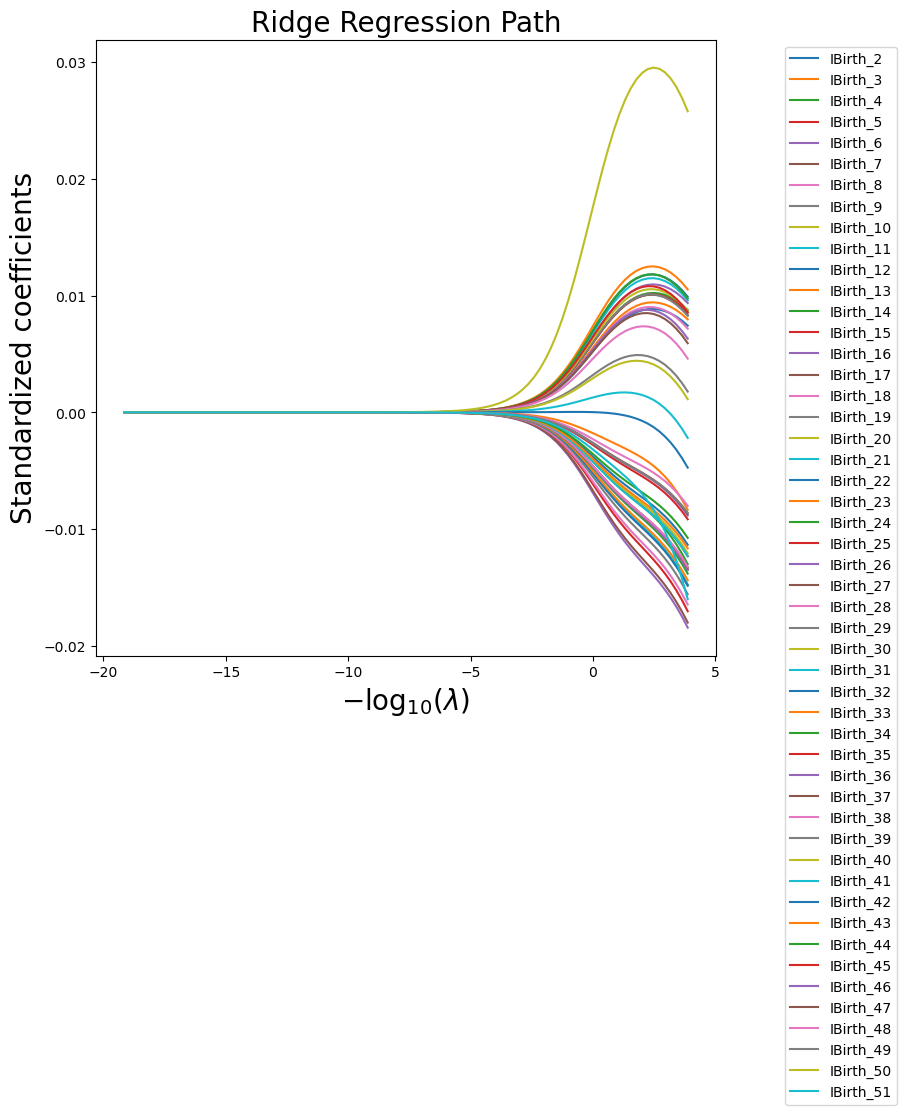

In [248]:
path_fig, ax = plt.subplots(figsize=(8, 8))

# Plot each column with a label
lines = []
for column in soln_path.columns:
    line, = ax.plot(soln_path.index, soln_path[column], label=column)
    lines.append(line)

# Set axis labels
ax.set_xlabel('$-\log_{10}(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)

# Add the legend
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Set title
plt.title('Ridge Regression Path', fontsize=20)

# Show plot
plt.show()

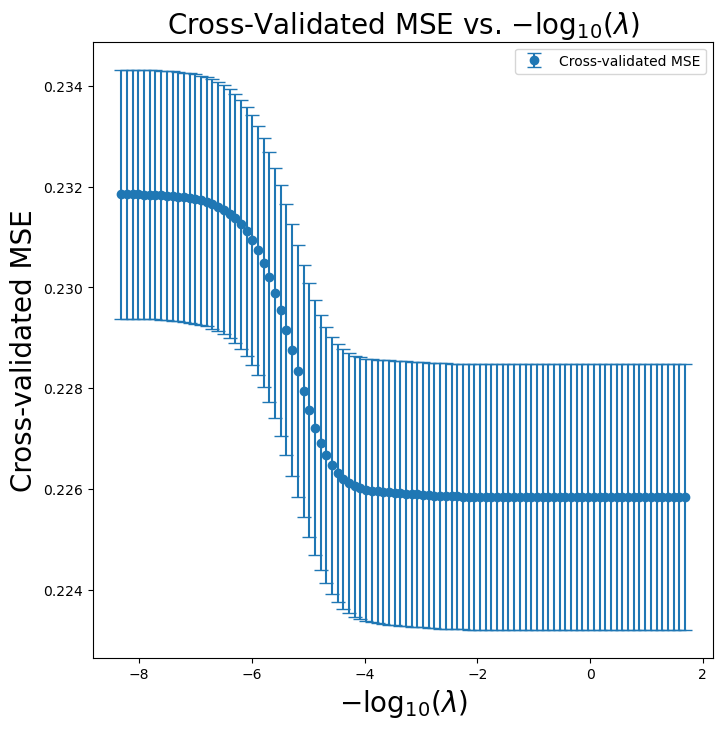

In [218]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

lambdas = 10**np.linspace(8, -2, 100) / y.std()

# Prepare lists to hold mean and standard deviation of MSE
mean_mse = []
std_mse = []

# Cross-validated MSE for each lambda
for lambda_ in lambdas:
    ridge_model = Ridge(alpha=lambda_)
    mse_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse.append(-mse_scores.mean())
    std_mse.append(mse_scores.std())
    
    
optimal_index = np.argmin(mean_mse)
optimal_lambda = lambdas[optimal_index]

# Fit the Ridge model with the optimal lambda
ridge_model = Ridge(alpha=optimal_lambda)
ridge_model.fit(X_scaled, y)

# Access the coefficients
coefficients = ridge_model.coef_

# Plotting the results

ridge_fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(-np.log10(lambdas),
            mean_mse,
            yerr=std_mse / np.sqrt(5),  # Adjusting for the number of folds
            fmt='o', capsize=5, label='Cross-validated MSE')

# Set limits and labels
ax.set_xlabel('$-\log_{10}(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_title('Cross-Validated MSE vs. $-\log_{10}(\lambda)$', fontsize=20)
ax.legend()

# Show the plot
plt.show()

In [220]:
coefficients 

array([-0.00052541, -0.00026486,  0.00033236, -0.00025775,  0.00023311,
       -0.00114493, -0.00253989, -0.00168242, -0.00149298, -0.00086497,
       -0.0007601 , -0.00055344, -0.00157431, -0.0030703 , -0.00566968,
       -0.0063806 , -0.00801052, -0.01115328, -0.01212429, -0.01588241,
       -0.01882208, -0.02285265, -0.02791875, -0.0324101 , -0.0337322 ,
       -0.033137  , -0.03138692, -0.03027488, -0.0293171 , -0.02909997,
       -0.02900885, -0.02827553, -0.02749811, -0.02686038, -0.02679875,
       -0.02630535, -0.02601271, -0.02489571, -0.02440919, -0.02436441,
       -0.02317298, -0.02327609, -0.02216606, -0.02027932, -0.01977962,
       -0.01943279, -0.01853525, -0.01882144,  0.00387106, -0.04589685])

In [188]:
from sklearn.model_selection import cross_val_score

# Store cross-validation scores for each lambda
cv_scores = []

for lambda_value in lambdas:
    ridge = Ridge(alpha=lambda_value)
    scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

best_lambda_index = np.argmax(cv_scores)
best_lambda = lambdas[best_lambda_index]




In [189]:
print(best_lambda)

11.088848518957407


In [191]:
beta_hat = soln_path.loc[soln_path.index[11]]
lambdas[11], beta_hat



(16088020.55168549,
 IBirth_2     0.000000
 IBirth_3     0.000000
 IBirth_4     0.001862
 IBirth_5     0.001635
 IBirth_6     0.005964
 IBirth_7     0.002159
 IBirth_8     0.000000
 IBirth_9     0.002706
 IBirth_10    0.005023
 IBirth_11    0.009786
 IBirth_12    0.011518
 IBirth_13    0.015226
 IBirth_14    0.012181
 IBirth_15    0.007627
 IBirth_16    0.000000
 IBirth_17    0.000000
 IBirth_18    0.000000
 IBirth_19    0.000000
 IBirth_20    0.000000
 IBirth_21    0.000000
 IBirth_22    0.000000
 IBirth_23    0.000000
 IBirth_24    0.000000
 IBirth_25    0.000000
 IBirth_26   -0.000077
 IBirth_27    0.000000
 IBirth_28    0.000000
 IBirth_29    0.000000
 IBirth_30    0.000000
 IBirth_31    0.000000
 IBirth_32    0.000000
 IBirth_33    0.000000
 IBirth_34    0.000000
 IBirth_35    0.000000
 IBirth_36    0.000000
 IBirth_37    0.000000
 IBirth_38    0.000000
 IBirth_39    0.000000
 IBirth_40    0.000000
 IBirth_41    0.000000
 IBirth_42    0.000000
 IBirth_43    0.000000
 IBirth_44    

In [192]:
np.linalg.norm(beta_hat)


0.11684565752278026

In [194]:
####LASSSO

In [265]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=10)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X_scaled, y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


3.655628434162265e-05

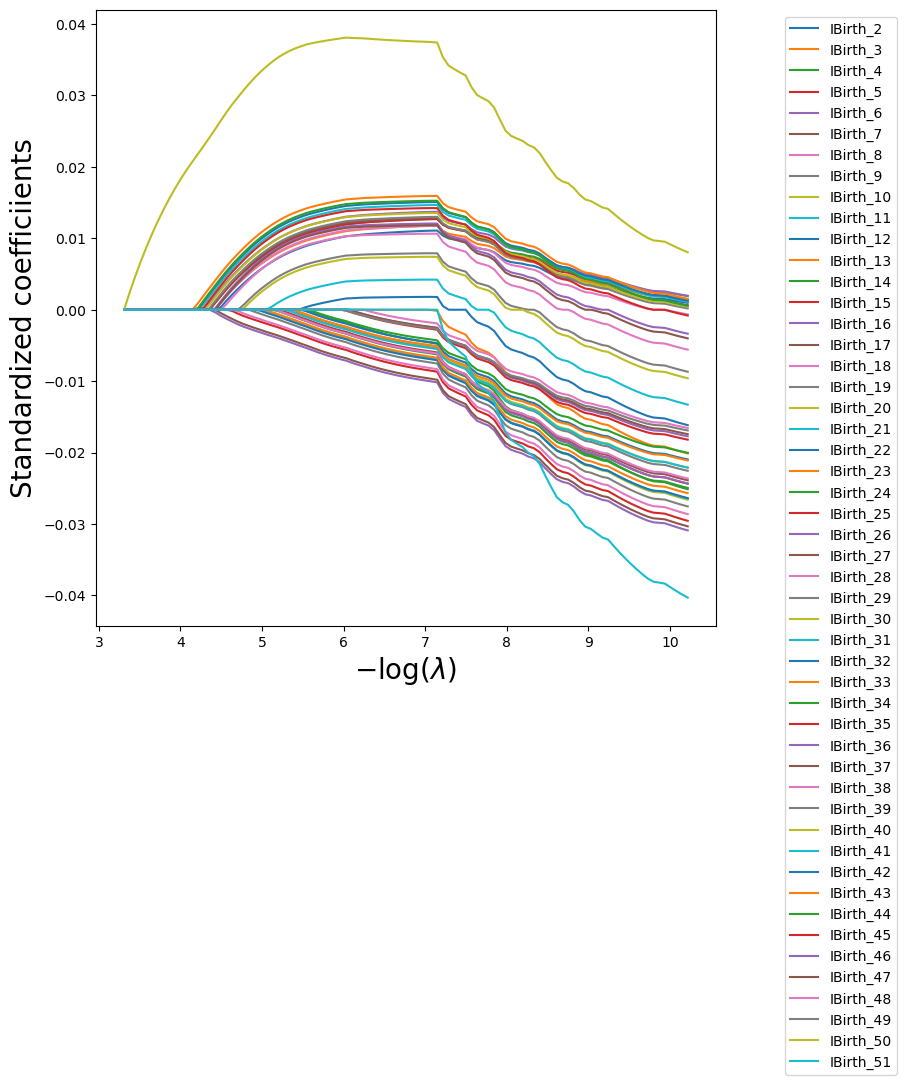

In [266]:

lambdas, soln_array = skl.Lasso.path(X_scaled,
                                    y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=df[all_vars].columns,
                         index=-np.log(lambdas))

path_fig, ax = subplots(figsize=(8,8))
soln_path.columns = soln_path.columns.str.lstrip('_')

soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


In [210]:
np.min(tuned_lasso.mse_path_.mean(1))


0.22580059413459322

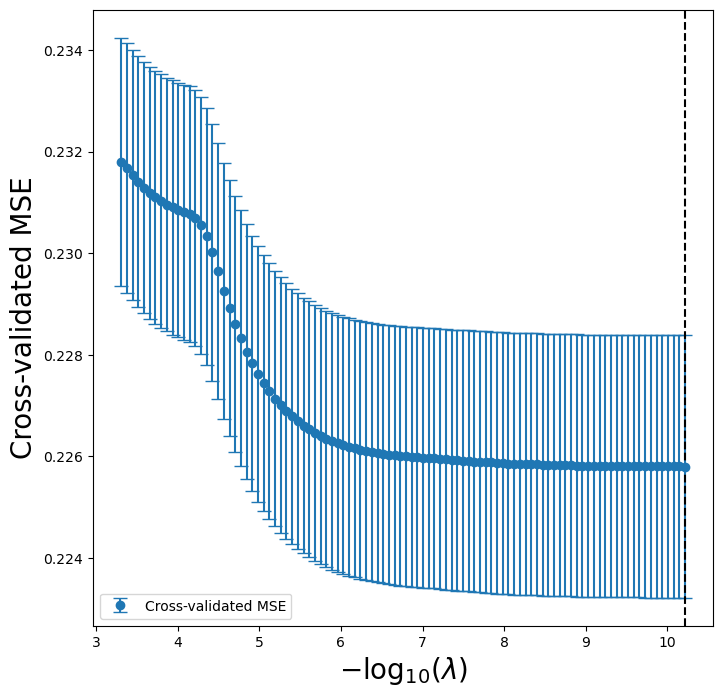

In [228]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K), fmt='o', capsize=5, label='Cross-validated MSE')

ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log_{10}(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.legend()

In [267]:
tuned_lasso.coef_


array([ 0.00096206,  0.00127612,  0.00191506,  0.00139369,  0.00194977,
        0.00063514, -0.00065237,  0.00018224,  0.00041597,  0.00110343,
        0.00124521,  0.00153263,  0.00055386, -0.00081256, -0.0033586 ,
       -0.00401109, -0.00558784, -0.00868123, -0.00959444, -0.01328356,
       -0.01615996, -0.0201253 , -0.02513318, -0.02955396, -0.03089748,
       -0.03033035, -0.02861322, -0.02754099, -0.02660922, -0.02642982,
       -0.02637376, -0.02568773, -0.02494769, -0.02435553, -0.02432387,
       -0.02388003, -0.02362887, -0.02255155, -0.02210361, -0.02210795,
       -0.02096069, -0.02110294, -0.02002993, -0.01819148, -0.01772473,
       -0.01741588, -0.01655403, -0.0168999 ,  0.00805146, -0.04030913])

In [302]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)


In [304]:
model = MS(df.columns.drop('rm_lfp'), intercept=False)
D = model.fit_transform(df)
feature_names = list(df.columns)
X = np.asarray(D)

In [305]:
X = df.drop(columns=['rm_lfp'])  # Drop the target variable
feature_names = X.columns.tolist()  #

print(df.dtypes)

ssuid             object
spanel             int16
swave               int8
srefmon             int8
rhcalmn             int8
                   ...  
_LlBiXpos_46_1      int8
_LlBiXpos_47_1      int8
_LlBiXpos_48_1      int8
_LlBiXpos_49_1      int8
_LlBiXpos_50_1      int8
Length: 226, dtype: object


In [306]:
df_clean = df.dropna(subset=['rm_lfp'])

# Step 2: Create feature matrix X and target variable y
X = df_clean.drop(columns=['rm_lfp'])  # Feature matrix
y = df_clean['rm_lfp'].reset_index(drop=True)

In [307]:


# Step 2: Create feature matrix X and target variable y
  
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df_clean['rm_lfp'],
                                test_size=0.3,
                                random_state=0)



print(f"Number of NaN values in y_train after split: {y_train.isna().sum()}")  # Should be 0


Number of NaN values in y_train after split: 0


Number of NaN values in y_train: 0


In [ ]:
from matplotlib.pyplot import subplots
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(10,10))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [157]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [158]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)


0.2288066285763747

In [283]:
file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)
# Load the Stata file into a DataFrame


# Display the first few rows of the DataFrame
column_names = df.columns.tolist()
df = df[all_vars+ ['rm_lfp']]


High = np.where(df.rm_lfp == 1,
                "Yes",
                "No")


In [284]:
model = MS(df.columns.drop('rm_lfp'), intercept=False)
D = model.fit_transform(df)
feature_names = list(df[all_vars].columns)
X = np.asarray(D)
df_clean = df.dropna(subset=['rm_lfp'])
X = df_clean.drop(columns=['rm_lfp']) 
High = df_clean['rm_lfp'].reset_index(drop=True)
feature_names = X.columns.tolist() 

In [285]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, High)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [286]:
accuracy_score(High, clf.predict(X))
#it is (y, y-hat)


print(f"Number of feature names: {len(feature_names)}")
print(f"Number of features in model: {clf.n_features_in_}")

Number of feature names: 50
Number of features in model: 50


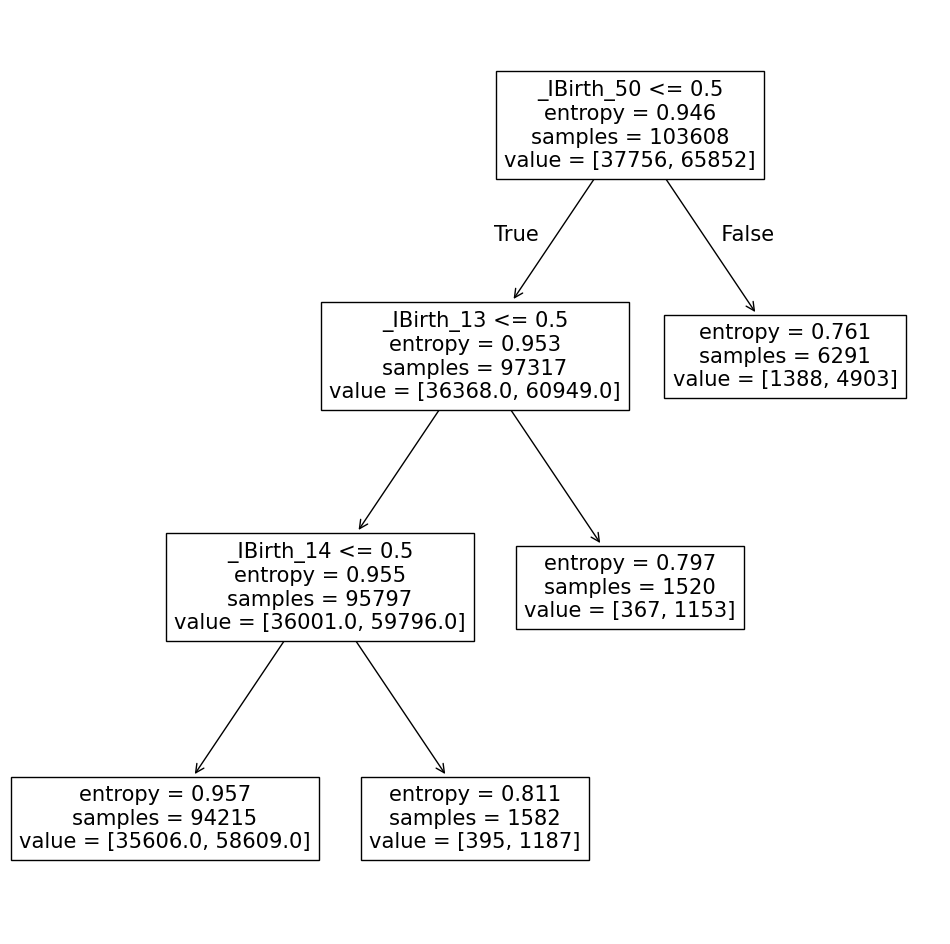

In [287]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf, 
          feature_names=feature_names, #specify the name of the x-variables you want to show
          ax=ax);

In [290]:
RF_boston = RF(max_features=50,
               random_state=0).fit(X, High)
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
_IBirth_50,0.213045
_IBirth_13,0.042801
_IBirth_14,0.040606
_IBirth_12,0.040286
_IBirth_11,0.039233
_IBirth_15,0.038616
_IBirth_10,0.037301
_IBirth_6,0.036958
_IBirth_9,0.035880
_IBirth_7,0.035708
